<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#10-points:-Cauchy-Kernel-Matrix" data-toc-modified-id="10-points:-Cauchy-Kernel-Matrix-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>10 points: Cauchy Kernel Matrix</a></span></li><li><span><a href="#15-points:-Ensemble-Kernel-Ridge-Regression" data-toc-modified-id="15-points:-Ensemble-Kernel-Ridge-Regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>15 points: Ensemble Kernel Ridge Regression</a></span></li><li><span><a href="#10-points:-Feature-Scaling" data-toc-modified-id="10-points:-Feature-Scaling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>10 points: Feature Scaling</a></span></li><li><span><a href="#10-points:-LASSO-regression" data-toc-modified-id="10-points:-LASSO-regression-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>10 points: LASSO regression</a></span></li><li><span><a href="#15-points:-Hyperparameter-Tuning" data-toc-modified-id="15-points:-Hyperparameter-Tuning-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>15 points: Hyperparameter Tuning</a></span></li><li><span><a href="#10-points-(6745-only):-Kernel-matrix-properties" data-toc-modified-id="10-points-(6745-only):-Kernel-matrix-properties-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>10 points (6745 only): Kernel matrix properties</a></span></li></ul></div>

# Homework: Regression

This homework will explore kernel regression, regularization, complexity optimization, and high-dimensional regression. The blocks below load in 2 datasets that you will work with. One is the same region of the ethanol dataset from the numerical methods module, and the other is the Dow process data.

Text(0,0.5,'absorbance')

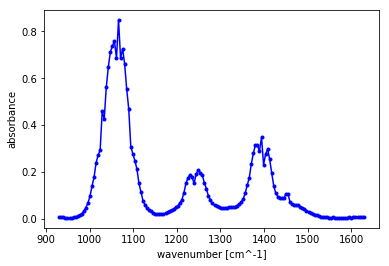

In [3]:
%matplotlib inline
import numpy as np
import pylab as plt
import pandas as pd

df = pd.read_csv('data/ethanol_IR.csv')
x_all = df['wavenumber [cm^-1]'].values
y_all = df['absorbance'].values

x_peak = x_all[100:250]
y_peak = y_all[100:250]

fig, ax = plt.subplots()
ax.plot(x_peak,y_peak, '-b', marker='.')
ax.set_xlabel('wavenumber [cm^-1]')
ax.set_ylabel('absorbance')

In [4]:
df = pd.read_excel('data/impurity_dataset-training.xlsx')

def is_real_and_finite(x):
    if not np.isreal(x):
        return False
    elif not np.isfinite(x):
        return False
    else:
        return True

all_data = df[df.columns[1:]].values #drop the first column (date)
numeric_map = df[df.columns[1:]].applymap(is_real_and_finite)
real_rows = numeric_map.all(axis=1).copy().values #True if all values in a row are real numbers
X = np.array(all_data[real_rows,:-5], dtype='float') #drop the last 5 cols that are not inputs
y = np.array(all_data[real_rows,-3], dtype='float')
y = y.reshape(-1,1)

print('X matrix dimensions: {}'.format(X.shape))
print('y vector dimensions: {}'.format(y.shape))

X matrix dimensions: (10297, 40)
y vector dimensions: (10297, 1)


## 10 points: Cauchy Kernel Matrix

Consider the Cauchy distribution defined by:

$C(x, x_0, \gamma) = \frac{1}{\pi \gamma} \left( \frac{\gamma^2}{(x-x_0)^2 + \gamma^2} \right)$

where $x_0$ is the center of the distribution (comparable to the mean, $\mu$ of a Gaussian distribution) and $\gamma$ is a scale factor (comparable to the standard deviation, $\sigma$ of a Gaussian distribution.

Write a function that computes the "Cauchy kernel" between any two vectors $x_i$ and $x_j$. Use this function to create and visualize kernel matrices for the ethanol spectra dataset with $\gamma \in $[1, 10, 100]. Briefly discuss the structure of these matrices.

*Hint* You may want to use the `imshow` function to visualize the matrices. See the examples for the covariance matrix given in the "High dimensional data" lecture.

## 15 points: Ensemble Kernel Ridge Regression

In this problem you will combine ideas from k-fold cross-validation and bootstrapping with kernel ridge regression (KRR) to create an "ensemble" of KRR models.

Use 5-fold cross-validation with the IR spectra dataset to construct a series of 5 KRR models with a radial basis function, $\gamma$ = 0.0005, and $\alpha$ = 0.01. Each model will be trained with 80% of the data, but the exact training points will vary each time so the models will also vary. 

Plot the resulting ensemble of models along with the original data. This should be a plot with 5 different lines and 150 data points.

Plot the standard deviation of the 5 models as a function of wavelength. Is the predicted error homoscedastic? Briefly explain.

## 10 points: Feature Scaling

Compare the performance of KRR on the Dow dataset with and without feature scaling. You should use the standard scaler, but can also compare to other scaling schemes. You can use $\gamma=0.01$ and $\alpha=0.01$, and should down-sample the dataset by selecting every 10th data point. Split the data into a testing and training set using hold out with 30% of the data used for testing. Compare the $r^2$ score of the two approaches.

## 10 points: LASSO regression

Apply LASSO regression to the Dow chemical dataset. Use `GridSearchCV` to determine the optimum value of $\alpha \in$ [1e-5, 1e-3, 1e-2, 1e-1, 1, 10]. Evaluate the performance of the best model, and describe which features (if any) were "dropped" (coefficients equal to zero). You may wish to compare this to the features identified by forward selection in the lecture.

## 15 points: Hyperparameter Tuning

Use `GridSearchCV` along with the Dow chemical dataset to determine the optimum $\gamma$ and $\alpha$ for a KRR model. You should scale the input features, and evalute the model on data that was not used in training. You will likely want to down-sample the data by selecting every 10th data point to accelerate the search.

*Hint* It is often useful to search by "orders of magnitude" first. You may also want to use multiple `GridSearchCV` calls to refine the parameters, though this is not technically necessary.

## 10 points (6745 only): Kernel matrix properties

Show that the kernel matrix for an RBF kernel will be equal to the identity matrix if $\gamma \rightarrow \infty$ and a constant matrix if $\gamma \rightarrow 0$.

You may do this symbolically with math or empirically with code. Either way, provide a brief conceptual explanation of the result.